<a href="https://colab.research.google.com/github/someone2009314/EuropeanDatabaseProject/blob/main/EuropeanDatabaseProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
!pip install scikit-learn==1.5.0 xgboost==2.0.0 #Current versions are not compatible with one another

In [ ]:
import numpy as np #All imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3 as sqlite3
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, mean_squared_error, root_mean_squared_error, f1_score, precision_score, recall_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
from sklearn import svm
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE
import tensorflow as tf
import xgboost as xg
from xgboost import XGBRegressor
!pip install gdown

# Pre-Processing

## Country Preprocessing

This dataset contains ....

In [ ]:
url = "https://drive.google.com/uc?id=1kYig94QVn3tRW7z3cR201tNxF5sS58Bi"

!gdown {url}
country_df = pd.read_csv(url)

Downloading...
From: https://drive.google.com/uc?id=1kYig94QVn3tRW7z3cR201tNxF5sS58Bi
To: /content/Country.csv
100% 159/159 [00:00<00:00, 515kB/s]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
country_df['name'] = le.fit_transform(country_df['name'])

## League Preprocessing

In [ ]:
url = "https://drive.google.com/uc?id=1Nevgxzg0JYDi5_-FUtxMRWRGyZpb8PdM"

!gdown {url}

league_df = pd.read_csv('League.csv')

Downloading...
From: https://drive.google.com/uc?id=1Nevgxzg0JYDi5_-FUtxMRWRGyZpb8PdM
To: /content/League.csv
100% 366/366 [00:00<00:00, 1.01MB/s]


In [ ]:
url = "https://drive.google.com/uc?id=1i79auEjoyGmt9u2WdDawR_VI1BJw4qcn"
!gdown {url}
league_df = pd.read_csv('League.csv')


Downloading...
From: https://drive.google.com/uc?id=1i79auEjoyGmt9u2WdDawR_VI1BJw4qcn
To: /content/Team_Attributes.csv
100% 216k/216k [00:00<00:00, 35.6MB/s]


In [ ]:
le = LabelEncoder()
league_df['name'] = le.fit_transform(league_df['name'])

league_df.head()

,id,country_id,name
0,1,1,0
1,1729,1729,1
2,4769,4769,2
3,7809,7809,3
4,10257,10257,4


## Match Preprocessing

In [ ]:
url = "https://drive.google.com/uc?id=1zR563X9Q2rwfqMB7NJZpxKYR6zxiHYcH"
!gdown {url}

match_df = pd.read_csv('Match.csv')

Downloading...
From (original): https://drive.google.com/uc?id=1zR563X9Q2rwfqMB7NJZpxKYR6zxiHYcH
From (redirected): https://drive.google.com/uc?id=1zR563X9Q2rwfqMB7NJZpxKYR6zxiHYcH&confirm=t&uuid=0d188a7e-dafd-4aad-b60e-e541ffede2a0
To: /content/Match.csv
100% 283M/283M [00:03<00:00, 72.8MB/s]


In [ ]:
for col in match_df.columns:
  if(np.sum(match_df[col].isnull())!=0):
    match_df.drop(col, axis = 1, inplace = True)


np.sum(match_df.isnull())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
id,0
country_id,0
league_id,0
season,0
stage,0
date,0
match_api_id,0
home_team_api_id,0
away_team_api_id,0
home_team_goal,0


In [ ]:
match_df.shape

(25979, 11)

In [ ]:
le = LabelEncoder()

match_df['season'] = le.fit_transform(match_df['season'])
match_df['date'] = pd.to_datetime(match_df['date'], format = '%Y-%m-%d %H:%M:%S')

match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,0,1,2008-08-17,492473,9987,9993,1,1
1,2,1,1,0,1,2008-08-16,492474,10000,9994,0,0
2,3,1,1,0,1,2008-08-16,492475,9984,8635,0,3
3,4,1,1,0,1,2008-08-17,492476,9991,9998,5,0
4,5,1,1,0,1,2008-08-16,492477,7947,9985,1,3


## Player Preprocessing

In [ ]:
url = "https://drive.google.com/uc?id=13xUre04TizEmiSaf4ctNpx5FdiPAgb16"

!gdown {url}
player_df = pd.read_csv('Player.csv')
player_df.head(20)

Downloading...
From: https://drive.google.com/uc?id=13xUre04TizEmiSaf4ctNpx5FdiPAgb16
To: /content/Player.csv
100% 705k/705k [00:00<00:00, 77.1MB/s]


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [ ]:
np.sum(player_df.isnull())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
id,0
player_api_id,0
player_name,0
player_fifa_api_id,0
birthday,0
height,0
weight,0


In [ ]:
arr = []
for row in player_df['birthday']:
  arr.append(int(row[0:4]))

print(pd.DataFrame(arr).describe())

                  0
count  11060.000000
mean    1986.642857
std        5.481362
min     1967.000000
25%     1983.000000
50%     1987.000000
75%     1991.000000
max     1999.000000


In [ ]:
def birthdayDisc():
  arr = []
  for row in player_df['birthday']:
    if(int(row[0:4])<=1978):
      arr.append("old")
    elif(int(row[0:4])<=1984):
      arr.append("prime")
    elif(int(row[0:4])>1984):
      arr.append("young")
  return arr
player_df['birthday'] = birthdayDisc()

In [ ]:
player_df['height'] = player_df['height']/100
player_df['weight'] = player_df['weight']*0.453592

In [ ]:
player_df['bmi'] = player_df['weight']/(player_df['height']**2)

In [ ]:
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,bmi
0,1,505942,Aaron Appindangoye,218353,young,1.8288,84.821704,25.361478
1,2,155782,Aaron Cresswell,189615,young,1.7018,66.224432,22.866579
2,3,162549,Aaron Doran,186170,young,1.7018,73.935496,25.529126
3,4,30572,Aaron Galindo,140161,prime,1.8288,89.811216,26.853330
4,5,23780,Aaron Hughes,17725,prime,1.8288,69.853168,20.885923


## Player Attributes Preprocessing

In [ ]:
url = "https://drive.google.com/uc?id=1UAj-oD_LSTfe4W3LoybwYP9xkzB3Y3zV"

!gdown {url}

player_preprocessing_df = pd.read_csv('Player_Attributes.csv')

Downloading...
From: https://drive.google.com/uc?id=1UAj-oD_LSTfe4W3LoybwYP9xkzB3Y3zV
To: /content/Player_Attributes.csv
100% 42.3M/42.3M [00:00<00:00, 147MB/s]


In [ ]:
player_preprocessing_df.head(20)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [ ]:
np.sum(player_preprocessing_df.isnull())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
id,0
player_fifa_api_id,0
player_api_id,0
date,0
overall_rating,836
potential,836
preferred_foot,836
attacking_work_rate,6869
defensive_work_rate,836
crossing,836


In [ ]:
player_preprocessing_df.dropna(inplace = True)
player_preprocessing_df.shape

(177037, 42)

In [ ]:
for i in player_preprocessing_df.columns:
  print(player_preprocessing_df[i].describe())

count    177037.000000
mean      91855.451137
std       53116.636210
min           1.000000
25%       45877.000000
50%       91777.000000
75%      137840.000000
max      183978.000000
Name: id, dtype: float64
count    177037.000000
mean     167125.158543
std       52562.250565
min           2.000000
25%      156986.000000
50%      183871.000000
75%      200215.000000
max      234141.000000
Name: player_fifa_api_id, dtype: float64
count    177037.000000
mean     138021.981682
std      137764.775099
min        2625.000000
25%       35477.000000
50%       89079.000000
75%      192856.000000
max      750584.000000
Name: player_api_id, dtype: float64
count                  177037
unique                    197
top       2007-02-22 00:00:00
freq                    10048
Name: date, dtype: object
count    177037.000000
mean         68.680248
std           7.034967
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_ra

In [ ]:
def ratingsC():
  arr = []

  for row in player_preprocessing_df['overall_rating']:
    if(row<=69):
      arr.append("low")
    elif(row<=79):
      arr.append("mid")
    elif(row<=89):
      arr.append("high")
    elif(row>89):
      arr.append("best")
  return arr

player_preprocessing_df['overall_rating'] = ratingsC()

In [ ]:
def potentialC():
  arr = []

  for row in player_preprocessing_df['potential']:
    if(row<=69):
      arr.append("low")
    elif(row<=79):
      arr.append("mid")
    elif(row<=89):
      arr.append("high")
    elif(row>89):
      arr.append("best")
  return arr

player_preprocessing_df['potential'] = potentialC()

In [ ]:
player_preprocessing_df['date'] = pd.to_datetime(player_preprocessing_df['date'], format  = '%Y-%m-%d %H:%M:%S')
type(player_preprocessing_df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
le = LabelEncoder()

for column in player_preprocessing_df.columns:
  if(player_preprocessing_df[column].dtype=='object' or pd.api.types.is_categorical_dtype(player_preprocessing_df[column])):
    le.fit(player_preprocessing_df[column])
    player_preprocessing_df[column] = le.transform(player_preprocessing_df[column])
player_preprocessing_df.head()

<ipython-input-249-0d358485a1b6>:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if(player_preprocessing_df[column].dtype=='object' or pd.api.types.is_categorical_dtype(player_preprocessing_df[column])):
<ipython-input-249-0d358485a1b6>:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if(player_preprocessing_df[column].dtype=='object' or pd.api.types.is_categorical_dtype(player_preprocessing_df[column])):


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,2,3,1,3,14,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19,2,3,1,3,14,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21,2,2,1,3,14,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20,2,2,1,3,14,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22,2,2,1,3,14,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## Team Preprocessing

In [ ]:
url = 'https://drive.google.com/uc?id=1ui7uKy4pnwN6qC2UuQLcc0rrSNUT_8pl'

!gdown {url}

team_df = pd.read_csv('Team.csv')

Downloading...
From: https://drive.google.com/uc?id=1ui7uKy4pnwN6qC2UuQLcc0rrSNUT_8pl
To: /content/Team.csv
100% 10.5k/10.5k [00:00<00:00, 20.9MB/s]


In [ ]:
team_df.head(20)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


In [ ]:
team_df.drop('team_short_name', axis = 1, inplace = True)
team_df.head()

team_df = team_df.rename(columns = {'team_long_name': 'team'})

In [ ]:
le = LabelEncoder()

team_df['team'] = le.fit_transform(team_df['team'])

team_df.head()

,id,team_api_id,team_fifa_api_id,team
0,1,9987,673.0,136
1,2,9993,675.0,27
2,3,10000,15005.0,236
3,4,9994,2007.0,248
4,5,9984,1750.0,137


## Team Attributes Preprocessing

In [ ]:
url = 'https://drive.google.com/uc?id=1i79auEjoyGmt9u2WdDawR_VI1BJw4qcn' #downloading dataset
!gdown {url}
df = pd.read_csv('Team_Attributes.csv')

Downloading...
From: https://drive.google.com/uc?id=1i79auEjoyGmt9u2WdDawR_VI1BJw4qcn
To: /content/Team_Attributes.csv
100% 216k/216k [00:00<00:00, 5.01MB/s]


In [ ]:
df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [ ]:
df.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [ ]:
np.sum(df.isnull()) #checking for null values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
id,0
team_fifa_api_id,0
team_api_id,0
date,0
buildUpPlaySpeed,0
buildUpPlaySpeedClass,0
buildUpPlayDribbling,969
buildUpPlayDribblingClass,0
buildUpPlayPassing,0
buildUpPlayPassingClass,0


(1458, 25)

In [ ]:
df.drop('date', axis = 1, inplace = True) #Visuals
df.drop('buildUpPlayDribbling', axis = 1, inplace = True)

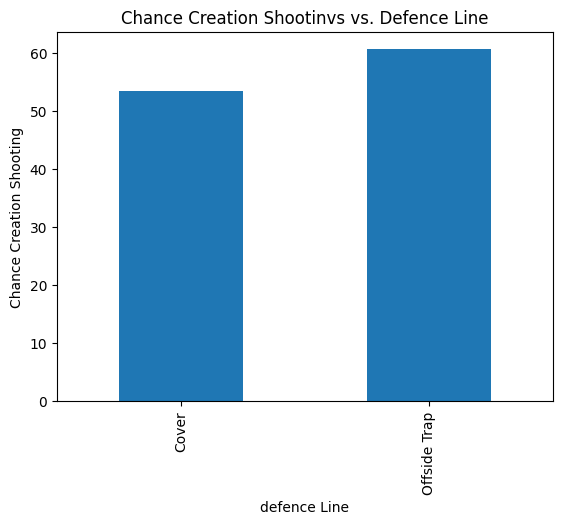

In [ ]:
df.groupby('defenceDefenderLineClass')['chanceCreationShooting'].mean().plot(kind = 'bar')
plt.xlabel('defence Line')
plt.ylabel('Chance Creation Shooting')
plt.title("Chance Creation Shootinvs vs. Defence Line")
plt.show()

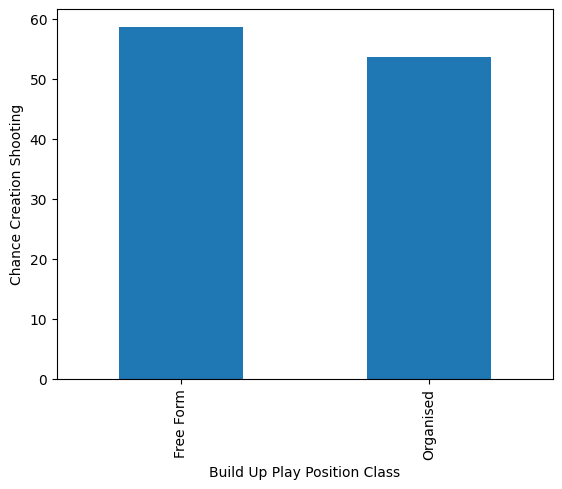

In [ ]:
df.groupby('buildUpPlayPositioningClass')['chanceCreationShooting'].mean().plot(kind = 'bar')
plt.xlabel('Build Up Play Position Class')
plt.ylabel('Chance Creation Shooting')
plt.show()

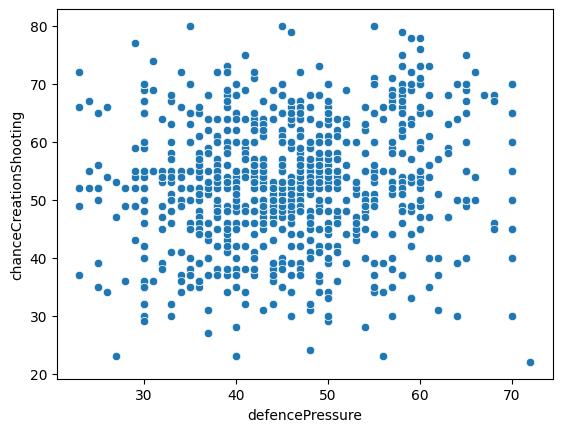

In [ ]:
sns.scatterplot(data = df, x = 'defencePressure', y = 'chanceCreationShooting')
plt.show()

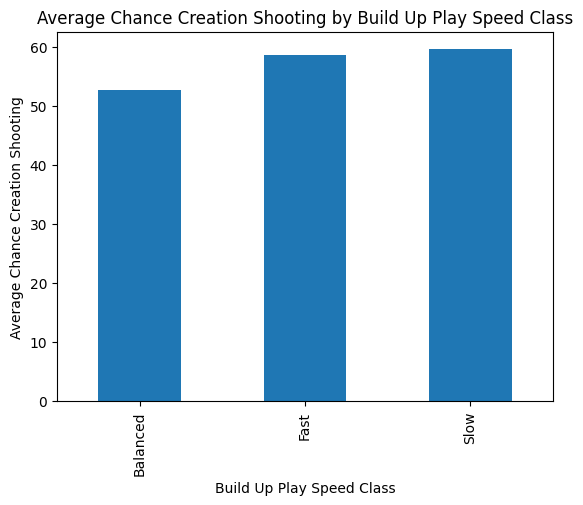

In [ ]:
df.groupby('buildUpPlaySpeedClass')['chanceCreationShooting'].mean().plot(kind='bar')
plt.title('Average Chance Creation Shooting by Build Up Play Speed Class')
plt.ylabel('Average Chance Creation Shooting')
plt.xlabel('Build Up Play Speed Class')
plt.show()

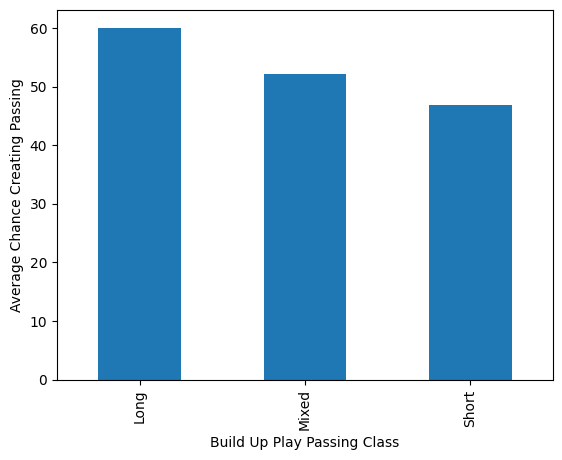

In [ ]:
df.groupby('buildUpPlayPassingClass')['chanceCreationPassing'].mean().plot(kind = 'bar')
plt.xlabel('Build Up Play Passing Class')
plt.ylabel('Average Chance Creating Passing')
plt.show()

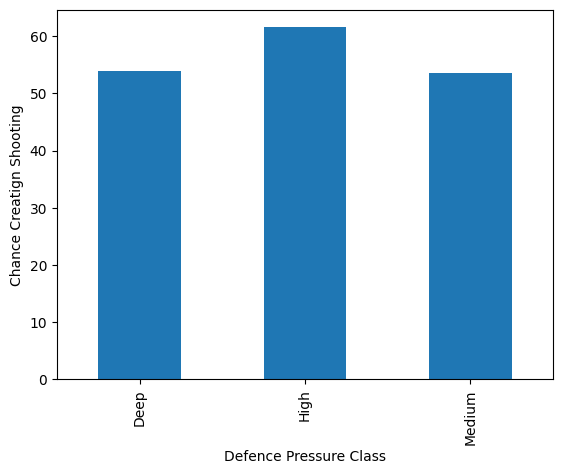

In [ ]:
df.groupby('defencePressureClass')['chanceCreationShooting'].mean().plot(kind = 'bar')
plt.xlabel('Defence Pressure Class')
plt.ylabel('Chance Creatign Shooting')
plt.show()

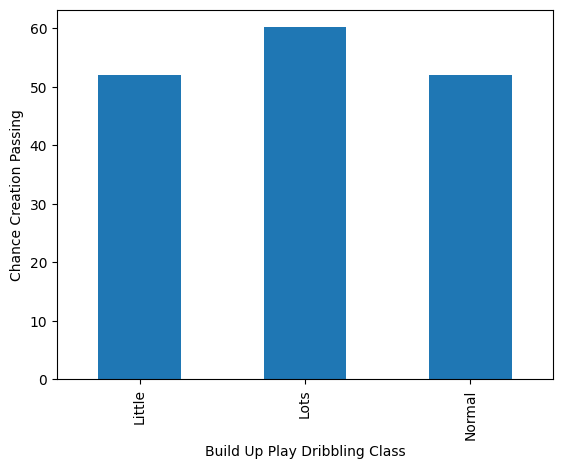

In [ ]:
df.groupby('buildUpPlayDribblingClass')['chanceCreationPassing'].mean().plot(kind = 'bar')
plt.xlabel('Build Up Play Dribbling Class')
plt.ylabel('Chance Creation Passing')
plt.show()

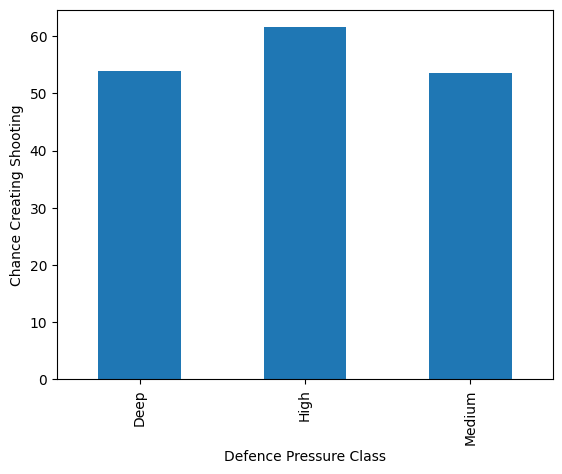

In [ ]:
df.groupby('defencePressureClass')['chanceCreationShooting'].mean().plot(kind = 'bar')
plt.xlabel('Defence Pressure Class')
plt.ylabel('Chance Creating Shooting')
plt.show()

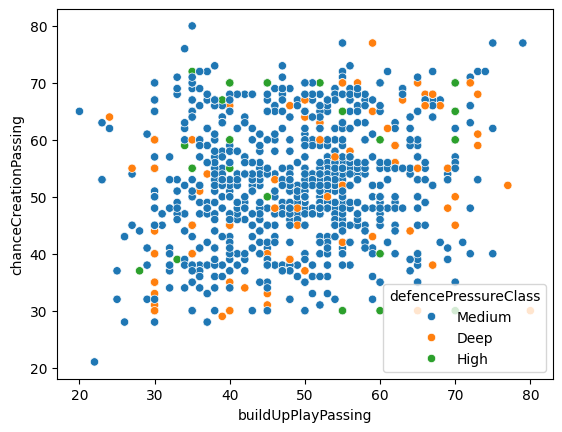

In [ ]:
sns.scatterplot(data = df, x = 'buildUpPlayPassing', y = 'chanceCreationPassing', hue = 'defencePressureClass')
plt.show()

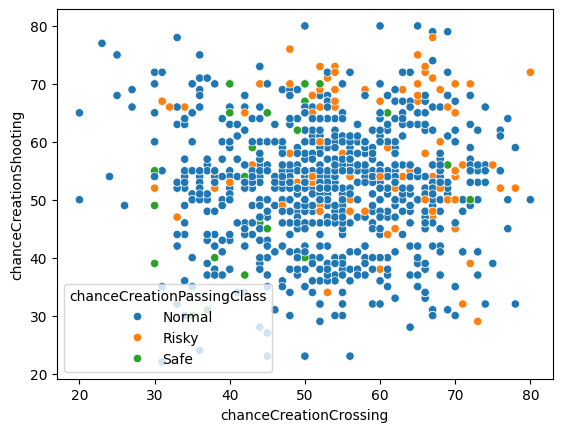

In [ ]:
sns.scatterplot(data = df, x = 'chanceCreationCrossing', y = 'chanceCreationShooting', hue = 'chanceCreationPassingClass')
plt.show()



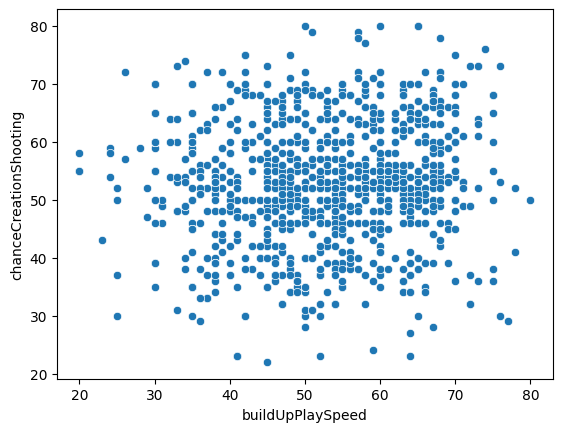

In [ ]:
sns.scatterplot(data = df, x = 'buildUpPlaySpeed', y = 'chanceCreationShooting')
plt.show()

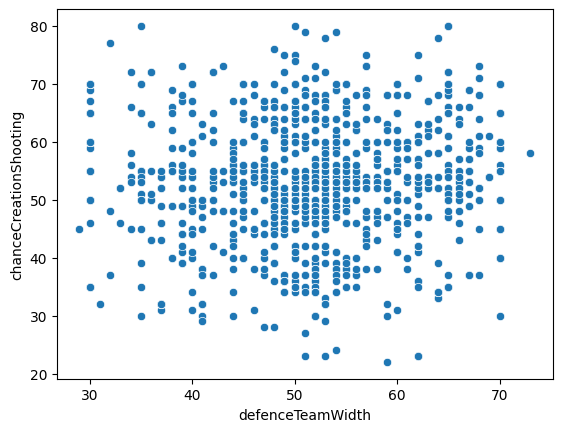

In [ ]:
sns.scatterplot(data = df, x = 'defenceTeamWidth', y = 'chanceCreationShooting')
plt.show()

In [ ]:
numerical = df.select_dtypes(exclude='number')
print(numerical)

     buildUpPlaySpeedClass buildUpPlayDribblingClass buildUpPlayPassingClass  \
0                 Balanced                    Little                   Mixed   
1                 Balanced                    Normal                   Mixed   
2                 Balanced                    Normal                   Mixed   
3                     Fast                    Little                    Long   
4                 Balanced                    Little                   Mixed   
...                    ...                       ...                     ...   
1453              Balanced                    Little                   Mixed   
1454              Balanced                    Little                   Mixed   
1455              Balanced                    Little                   Mixed   
1456              Balanced                    Normal                   Mixed   
1457              Balanced                    Normal                   Mixed   

     buildUpPlayPositioningClass chance

In [ ]:
df['chanceCreationShootingClass'].value_counts() #Checking for imbalance in chanceCreationShootingClass

,count
chanceCreationShootingClass,
Normal,1224
Lots,197
Little,37


In [ ]:
#Tried to create more buckets ad discretize more, but lowered model performances
"""
lowArr = np.array([])

for i in range(df.shape[0]):
  if(df['chanceCreationShootingClass'][i]=='Little'):
    lowArr = np.append(lowArr, df['chanceCreationShooting'][i])

smallLow = np.min(lowArr)
bigLow = np.max(lowArr)

print(smallLow)
print(bigLow)
"""

"\nlowArr = np.array([])\n\nfor i in range(df.shape[0]):\n  if(df['chanceCreationShootingClass'][i]=='Little'):\n    lowArr = np.append(lowArr, df['chanceCreationShooting'][i])\n\nsmallLow = np.min(lowArr)\nbigLow = np.max(lowArr)\n\nprint(smallLow)\nprint(bigLow)\n"

In [ ]:
"""
normalArr = np.array([])

for i in range(df.shape[0]):
  if(df['chanceCreationShootingClass'][i]=='Normal'):
    normalArr = np.append(normalArr, df['chanceCreationShooting'][i])

smallNormal = np.min(normalArr)
bigNormal = np.max(normalArr)

print(smallNormal)
print(bigNormal)
"""

"\nnormalArr = np.array([])\n\nfor i in range(df.shape[0]):\n  if(df['chanceCreationShootingClass'][i]=='Normal'):\n    normalArr = np.append(normalArr, df['chanceCreationShooting'][i])\n\nsmallNormal = np.min(normalArr)\nbigNormal = np.max(normalArr)\n\nprint(smallNormal)\nprint(bigNormal)\n"

In [ ]:
"""
highArr = np.array([])

for i in range(df.shape[0]):
  if(df['chanceCreationShootingClass'][i]=='Lots'):
    highArr = np.append(highArr, df['chanceCreationShooting'][i])

smallHigh = np.min(highArr)
bigHigh = np.max(highArr)

print(smallHigh)
print(bigHigh)
"""

"\nhighArr = np.array([])\n\nfor i in range(df.shape[0]):\n  if(df['chanceCreationShootingClass'][i]=='Lots'):\n    highArr = np.append(highArr, df['chanceCreationShooting'][i])\n\nsmallHigh = np.min(highArr)\nbigHigh = np.max(highArr)\n\nprint(smallHigh)\nprint(bigHigh)\n"

In [ ]:
"""
shootingClass2 = pd.Series([], dtype = object)

for i in range(df.shape[0]):
  #low class
  if(df['chanceCreationShooting'][i]>=22 and df['chanceCreationShooting'][i]<27.5):
    shootingClass2 = pd.concat([shootingClass2, pd.Series(['Small Little'])], ignore_index = True)
  elif(df['chanceCreationShooting'][i]>27.5 and df['chanceCreationShooting'][i]<=33):
    shootingClass2 = pd.concat([shootingClass2, pd.Series(['High Little'])], ignore_index = True)

    #just normal class
  if(df['chanceCreationShooting'][i]>=34 and df['chanceCreationShooting'][i]<=42):
    shootingClass2 = pd.concat([shootingClass2, pd.Series(['Smallest Normal'])], ignore_index = True)
  elif(df['chanceCreationShooting'][i]>42 and df['chanceCreationShooting'][i]<=50):
    shootingClass2 = pd.concat([shootingClass2, pd.Series(['Small Normal'])], ignore_index = True)
  elif(df['chanceCreationShooting'][i]>50 and df['chanceCreationShooting'][i]<=58):
    shootingClass2 = pd.concat([shootingClass2, pd.Series(['High Normal'])], ignore_index = True)
  elif(df['chanceCreationShooting'][i]>58 and df['chanceCreationShooting'][i]<=66):
    shootingClass2 = pd.concat([shootingClass2, pd.Series(['Highest Normal'])], ignore_index = True)
  else:
    shootingClass2 = pd.concat([shootingClass2, pd.Series([df['chanceCreationShootingClass'][i]])], ignore_index = True)


    #high class
  elif(df['chanceCreationShooting'][i]>=67 and df['chanceCreationShooting'][i]<73.5):
    shootingClass2 = pd.concat([shootingClass2, pd.Series(['Small Lots'])], ignore_index = True)
  elif(df['chanceCreationShooting'][i]>73.5 and df['chanceCreationShooting'][i]<=80):
    shootingClass2 = pd.concat([shootingClass2, pd.Series(['High Lots'])], ignore_index = True)

print(shootingClass2)
"""

"\nshootingClass2 = pd.Series([], dtype = object)\n\nfor i in range(df.shape[0]):\n  #low class\n  if(df['chanceCreationShooting'][i]>=22 and df['chanceCreationShooting'][i]<27.5):\n    shootingClass2 = pd.concat([shootingClass2, pd.Series(['Small Little'])], ignore_index = True)\n  elif(df['chanceCreationShooting'][i]>27.5 and df['chanceCreationShooting'][i]<=33):\n    shootingClass2 = pd.concat([shootingClass2, pd.Series(['High Little'])], ignore_index = True)\n\n    #just normal class\n  if(df['chanceCreationShooting'][i]>=34 and df['chanceCreationShooting'][i]<=42):\n    shootingClass2 = pd.concat([shootingClass2, pd.Series(['Smallest Normal'])], ignore_index = True)\n  elif(df['chanceCreationShooting'][i]>42 and df['chanceCreationShooting'][i]<=50):\n    shootingClass2 = pd.concat([shootingClass2, pd.Series(['Small Normal'])], ignore_index = True)\n  elif(df['chanceCreationShooting'][i]>50 and df['chanceCreationShooting'][i]<=58):\n    shootingClass2 = pd.concat([shootingClass2, p

In [ ]:
"""
print(shootingClass2.value_counts())
print(shootingClass2.shape)
df['chanceCreationShootingClassMore'] = shootingClass2
"""

"\nprint(shootingClass2.value_counts())\nprint(shootingClass2.shape)\ndf['chanceCreationShootingClassMore'] = shootingClass2\n"

In [ ]:
df.head()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,60,Balanced,Little,50,Mixed,Organised,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,52,Balanced,Normal,56,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,47,Balanced,Normal,54,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,70,Fast,Little,70,Long,Organised,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,47,Balanced,Little,52,Mixed,Organised,53,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [ ]:
le = LabelEncoder() #Encoding categorical columns

for column in df.columns:
  if(df[column].dtype=='object' or pd.api.types.is_categorical_dtype(df[column])):
    le.fit(df[column])
    df[column] = le.transform(df[column])
df.head()

<ipython-input-29-cc0394313049>:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if(df[column].dtype=='object' or pd.api.types.is_categorical_dtype(df[column])):
<ipython-input-29-cc0394313049>:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if(df[column].dtype=='object' or pd.api.types.is_categorical_dtype(df[column])):
<ipython-input-29-cc0394313049>:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if(df[column].dtype=='object' or pd.api.types.is_categorical_dtype(df[column])):
<ipython-input-29-cc0394313049>:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if(df[column].dtype==

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,60,0,0,50,1,1,60,...,55,2,1,50,2,55,2,45,1,0
1,2,434,9930,52,0,2,56,1,1,54,...,64,2,1,47,2,44,2,54,1,0
2,3,434,9930,47,0,2,54,1,1,54,...,64,2,1,47,2,44,2,54,1,0
3,4,77,8485,70,1,0,70,0,1,70,...,70,1,1,60,2,70,1,70,2,0
4,5,77,8485,47,0,0,52,1,1,53,...,52,2,1,47,2,47,2,52,1,0


In [ ]:
index = df.shape[0]  #Synthesizing "Lots" and "Little" classes
fixed = df.shape[0]

for i in range(fixed):
  if(df['chanceCreationShootingClass'][i]==0 or df['chanceCreationShootingClass'][i]==1):
    df.loc[index] = df.loc[i]
    index+=1


In [ ]:
df['chanceCreationShootingClass'].value_counts() #More even

,count
chanceCreationShootingClass,
2,1224
1,394
0,74


In [ ]:
for i in df.columns:
  print(i + str(df[i].unique()))


id[   1    2    3 ... 1456 1457 1458]
team_fifa_api_id[   434     77    614     47   1901    650    245   1861    229   1530
 111082 111989    159 112513      1      2     39    448    240 100409
     57   1906    241   1848    896     32     21    675   1897   1889
   1714    234     88      3   1926   1898    160    189      4     59
     22     23 111376   1943   1896    190    378   1796    210   1842
    647   1961 112409 110364    450     78   1750 110915      5    192
    231   1867 110747   1799 110502    635    242 110569    180    181
    182    467 110500   1824    468   1746    162    452  10020   2013
      7 111271   1971     79     31 100626   1915    236   1903    286
    894    246 110374 110636     25 111657    144    673 110556    674
   1860 110316   1888 110744 100632 110565 111429 110832    322   1805
    165     62     28    184    485     80 100634 100879    166     81
  10029   1952 111239     44    620 110745     45     29   1832     82
 111083 100081 110724  

In [ ]:
print(df.describe())

                id  team_fifa_api_id    team_api_id  buildUpPlaySpeed  \
count  1692.000000       1692.000000    1692.000000       1692.000000   
mean    731.848700      17869.972813    9867.306147         52.527187   
std     418.844394      39338.718791   12574.148849         11.898490   
min       1.000000          1.000000    1601.000000         20.000000   
25%     370.750000         95.000000    8456.000000         45.000000   
50%     728.500000        481.000000    8668.000000         52.500000   
75%    1088.250000       1897.000000    9882.750000         63.000000   
max    1458.000000     112513.000000  274581.000000         80.000000   

       buildUpPlaySpeedClass  buildUpPlayDribblingClass  buildUpPlayPassing  \
count            1692.000000                1692.000000         1692.000000   
mean                0.293144                   0.580378           48.237589   
std                 0.604830                   0.898803           11.116726   
min                 0.0000

# Regression Models
Did not use Regression for project

Ridge and Lasso Regression

In [ ]:
"""dropped = ['id', 'team_fifa_api_id', 'team_api_id', 'chanceCreationShooting', 'chanceCreationShootingClass', 'chanceCreationShootingClassMore']


X = df.drop(columns = 'chanceCreationShooting', axis = 1)
y = df['chanceCreationShooting']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = Ridge(alpha = 0.1)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
"""


"dropped = ['id', 'team_fifa_api_id', 'team_api_id', 'chanceCreationShooting', 'chanceCreationShootingClass', 'chanceCreationShootingClassMore']\n\n\nX = df.drop(columns = 'chanceCreationShooting', axis = 1)\ny = df['chanceCreationShooting']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n\nmodel = Ridge(alpha = 0.1)\n\nmodel.fit(X_train, y_train)\n\npred = model.predict(X_test)\n\nprint(r2_score(y_test, pred))\nprint(mean_squared_error(y_test, pred))\nprint(mean_absolute_error(y_test, pred))\n"

In [ ]:
"""X = df.drop(columns = 'chanceCreationShooting', axis = 1)
y = df['chanceCreationShooting']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = Lasso(alpha = 0.02)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print()
"""

"X = df.drop(columns = 'chanceCreationShooting', axis = 1)\ny = df['chanceCreationShooting']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n\nmodel = Lasso(alpha = 0.02)\nmodel.fit(X_train, y_train)\n\npred = model.predict(X_test)\n\nprint(r2_score(y_test, pred))\nprint(mean_squared_error(y_test, pred))\nprint(mean_absolute_error(y_test, pred))\nprint()\n"

Random Forest Regressor

In [ ]:
"""dropped = ['id', 'team_fifa_api_id', 'team_api_id', 'chanceCreationShooting', 'chanceCreationShootingClass']

X = df.drop(dropped, axis = 1)
y = df['chanceCreationShooting']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model1 = RandomForestRegressor()

params = {
  'max_depth':[None, 10, 15, 20, 25, 30],
  'max_features': [0.25, 0.5, 0.75, 1.0, 'sqrt'],
  'max_leaf_nodes': [10, 30, 50, 70, 90],
  'max_samples': [None, 0.1, 0.25, 0.5, 0.75, 1.0],
  'n_estimators': [50, 100, 150, 200, 250, 300, 350, 450, 500],
  'random_state': [None, 36, 42, 64, 128],
  'min_samples_split': [2, 4, 6, 8],
  'min_samples_leaf': [1, 2, 3, 4, 5]
}

random_search = RandomizedSearchCV(
    estimator = model1,
    param_distributions=params,
    n_iter=10,
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
print("Best Model:", random_search.best_estimator_)
"""

'dropped = [\'id\', \'team_fifa_api_id\', \'team_api_id\', \'chanceCreationShooting\', \'chanceCreationShootingClass\']\n\nX = df.drop(dropped, axis = 1)\ny = df[\'chanceCreationShooting\']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)\n\nmodel1 = RandomForestRegressor()\n\nparams = {\n  \'max_depth\':[None, 10, 15, 20, 25, 30],\n  \'max_features\': [0.25, 0.5, 0.75, 1.0, \'sqrt\'],\n  \'max_leaf_nodes\': [10, 30, 50, 70, 90],\n  \'max_samples\': [None, 0.1, 0.25, 0.5, 0.75, 1.0],\n  \'n_estimators\': [50, 100, 150, 200, 250, 300, 350, 450, 500],\n  \'random_state\': [None, 36, 42, 64, 128],\n  \'min_samples_split\': [2, 4, 6, 8],\n  \'min_samples_leaf\': [1, 2, 3, 4, 5]\n}\n\nrandom_search = RandomizedSearchCV(\n    estimator = model1,\n    param_distributions=params,\n    n_iter=10,\n    cv=3,\n    random_state=42,\n    n_jobs=-1\n)\n\nrandom_search.fit(X_train, y_train)\n\nprint("Best Parameters:", random_search.best_params_)\nprint

In [ ]:
"""model1 = RandomForestRegressor(max_depth=15, max_leaf_nodes=50, max_samples=0.75,
                      min_samples_leaf=3, min_samples_split=4, n_estimators=350,
                      random_state=64)

model1.fit(X_train, y_train)

pred = model1.predict(X_test)

print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(root_mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))
"""

'model1 = RandomForestRegressor(max_depth=15, max_leaf_nodes=50, max_samples=0.75,\n                      min_samples_leaf=3, min_samples_split=4, n_estimators=350,\n                      random_state=64)\n\nmodel1.fit(X_train, y_train)\n\npred = model1.predict(X_test)\n\nprint(mean_absolute_error(y_test, pred))\nprint(mean_squared_error(y_test, pred))\nprint(root_mean_squared_error(y_test, pred))\nprint(r2_score(y_test, pred))\n'

In [ ]:
"""X = df.drop(dropped, axis = 1)
y = df['chanceCreationShooting']
model5 = XGBRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.3, 0.6, 0.9]
}

randomSearch = RandomizedSearchCV(
    estimator = model5,
    param_distributions = params,
    n_iter=20,
    scoring='r2',
    cv=5,
    random_state=42,
    n_jobs=-1
)
randomSearch.fit(X_train, y_train)

print(randomSearch.best_params_)
print(randomSearch.best_score_)
"""

"X = df.drop(dropped, axis = 1)\ny = df['chanceCreationShooting']\nmodel5 = XGBRegressor()\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n\n\nparams = {\n    'n_estimators': [50, 100, 150],\n    'max_depth': [3, 5, 7],\n    'learning_rate': [0.01, 0.1, 0.2],\n    'subsample': [0.8, 1.0],\n    'colsample_bytree': [0.3, 0.6, 0.9]\n}\n\nrandomSearch = RandomizedSearchCV(\n    estimator = model5,\n    param_distributions = params,\n    n_iter=20,\n    scoring='r2',\n    cv=5,\n    random_state=42,\n    n_jobs=-1\n)\nrandomSearch.fit(X_train, y_train)\n\nprint(randomSearch.best_params_)\nprint(randomSearch.best_score_)\n"

XGB Regressor

In [ ]:
"""model5 = XGBRegressor(
    subsample = 0.8,
    n_estimators = 100,
    max_depth = 7,
    learning_rate = 0.2,
    colsample_bytree = 0.9
)

model5.fit(X_train, y_train)

pred = model5.predict(X_test)
"""

'model5 = XGBRegressor(\n    subsample = 0.8,\n    n_estimators = 100,\n    max_depth = 7,\n    learning_rate = 0.2,\n    colsample_bytree = 0.9\n)\n\nmodel5.fit(X_train, y_train)\n\npred = model5.predict(X_test)\n'

In [ ]:
"""print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
"""

'print(r2_score(y_test, pred))\nprint(mean_squared_error(y_test, pred))\nprint(mean_absolute_error(y_test, pred))\n'

#Classification Models

Sequential NN/
Didn't use NN

In [ ]:
"""X = df.drop(dropped, axis = 1)
y = df['chanceCreationShootingClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model3.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['accuracy'])

model3.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2)
"""

"X = df.drop(dropped, axis = 1)\ny = df['chanceCreationShootingClass']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n\n\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n\n\nmodel3 = tf.keras.Sequential([\n    tf.keras.layers.Dense(256, activation = 'relu', input_shape=(X_train.shape[1],)),\n    tf.keras.layers.Dense(128, activation = 'relu'),\n    tf.keras.layers.Dense(64, activation = 'relu'),\n    tf.keras.layers.Dense(32, activation = 'relu'),\n    tf.keras.layers.Dense(16, activation = 'relu'),\n    tf.keras.layers.Dense(3, activation = 'softmax')\n])\n\nmodel3.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['accuracy'])\n\nmodel3.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2)\n"

In [ ]:
"""pred = model3.predict(X_test)

pred = np.argmax(pred, axis=1)

print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred, average = 'weighted'))
print(precision_score(y_test, pred, average = 'weighted'))
print(recall_score(y_test, pred, average = 'weighted'))"""

"pred = model3.predict(X_test)\n\npred = np.argmax(pred, axis=1)\n\nprint(accuracy_score(y_test, pred))\nprint(f1_score(y_test, pred, average = 'weighted'))\nprint(precision_score(y_test, pred, average = 'weighted'))\nprint(recall_score(y_test, pred, average = 'weighted'))"

Logistic Regression

In [ ]:
dropped = ['id', 'team_fifa_api_id', 'team_api_id', 'chanceCreationShooting', 'chanceCreationShootingClass'] #Dropping columns

weight = {0:2, 1:1, 2:1} #Setting weights for imbalanced classes

model6 = LogisticRegression(class_weight = weight)

X = df.drop(dropped, axis = 1)
y = df['chanceCreationShootingClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #Spliting into train and test data

model6.fit(X_train, y_train)

pred = model6.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logistic_f1_score = f1_score(y_test, pred, average = 'weighted')
logistic_precision = precision_score(y_test, pred, average = 'weighted')
logistsic_recall = recall_score(y_test, pred , average = 'weighted')

print(accuracy_score(y_test, pred)) #Metrics
print(balanced_accuracy_score(y_test, pred))
print(logistic_f1_score)
print(logistic_precision)
print(logistsic_recall)


0.7522123893805309
0.42736414206247325
0.7134850438546166
0.6954034402622626
0.7522123893805309


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[  0   2  15]
 [  0  27  49]
 [  0  18 228]]


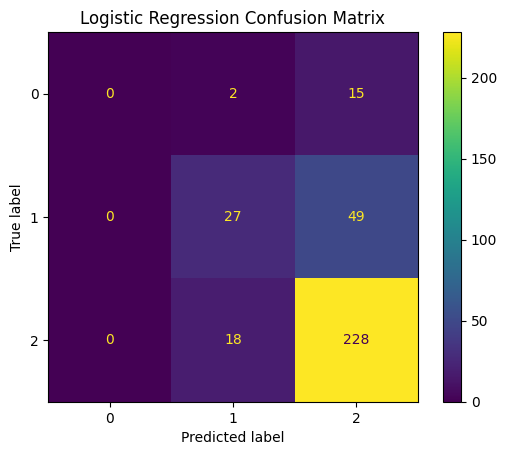

In [ ]:
cm = confusion_matrix(y_test, pred) #confusion matrix
print(cm)

display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

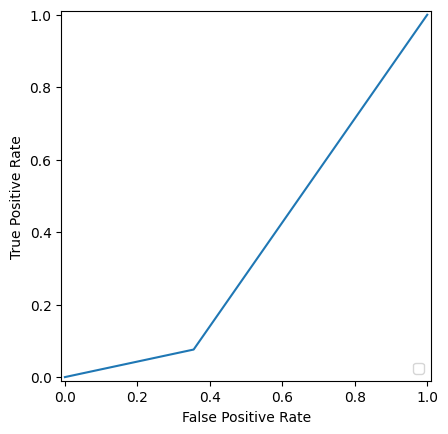

In [ ]:
y_test = (y_test ==1).astype(int).to_numpy() #roc graph
pred = (pred == 1).astype(int)

y_test = y_test.reshape(-1, 1)
pred = pred.reshape(-1, 1)

tpr, fpr, _ = roc_curve(y_test, pred)
roc_display = RocCurveDisplay(tpr = tpr, fpr = fpr)

roc_display.plot()

In [ ]:
auc = tf.keras.metrics.AUC() #auc value
auc.update_state(y_test, pred)

auc_value = auc.result().numpy()
print(auc_value)

0.63960874


Random Forest Classifier

In [ ]:
model2 = RandomForestClassifier()
#performing randomized search for random forest
params = {
  'max_depth':[None, 10, 15, 20, 25, 30],
  'max_features': [0.25, 0.5, 0.75, 1.0],
  'max_leaf_nodes': [10, 30, 50, 70, 90],
  'max_samples': [None, 0.1, 0.25, 0.5, 0.75, 1.0],
  'n_estimators': [50, 100, 150, 200, 250, 300, 350, 450, 500],
  'random_state': [None, 36, 42, 64, 128]
}

random_search = RandomizedSearchCV(
    estimator = model2,
    param_distributions=params,
    n_iter=10,
    cv=3,
    random_state=42,
    n_jobs=-1
)

X = df.drop(columns = dropped, axis = 1)
y = df['chanceCreationShootingClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #splitting into train and test

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_) #looking for best parameters
print("Best Score:", random_search.best_score_)
print("Best Model:", random_search.best_estimator_)


Best Parameters: {'random_state': None, 'n_estimators': 450, 'max_samples': 1.0, 'max_leaf_nodes': 90, 'max_features': 1.0, 'max_depth': None}
Best Score: 0.8669623059866963
Best Model: RandomForestClassifier(max_features=1.0, max_leaf_nodes=90, max_samples=1.0,
                       n_estimators=450)


In [ ]:
model2 = RandomForestClassifier(max_depth=20, max_features=1.0, max_leaf_nodes=90,
                       max_samples=1.0, n_estimators=250, class_weight = 'balanced')
model2.fit(X_train, y_train) #training model based on best parameters

pred = model2.predict(X_test)

In [ ]:
random_f1_score = f1_score(y_test, pred, average = 'weighted')
random_precision = precision_score(y_test, pred, average = 'weighted')
random_recall = recall_score(y_test, pred, average = 'weighted')

print(accuracy_score(y_test, pred)) #metrics
print(balanced_accuracy_score(y_test, pred))
print(random_f1_score)
print(random_precision)
print(random_recall)

0.9085545722713865
0.8889272938749534
0.9105427979324023
0.9172289940926182
0.9085545722713865


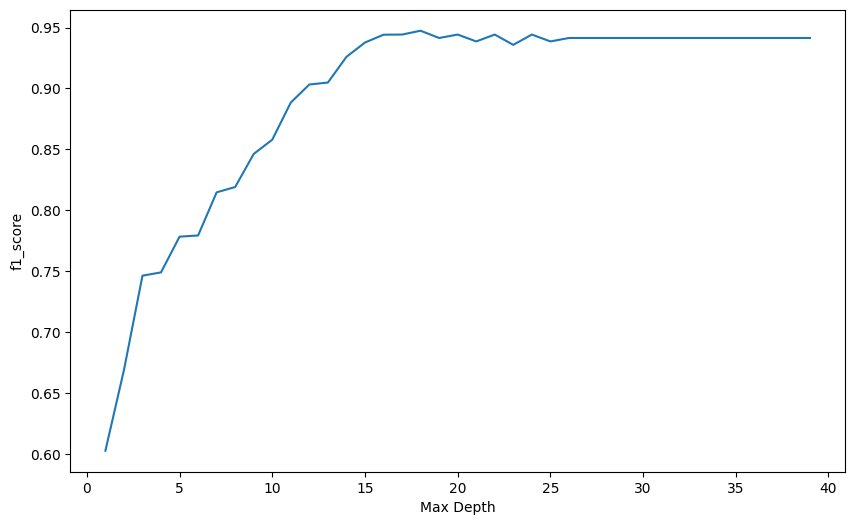

In [ ]:
mae_values = []

for k in range(1, 40):
  grid_model = RandomForestClassifier(max_depth = k, random_state = 0)
  grid_model.fit(X_train, y_train)
  pred = grid_model.predict(X_test)
  mae_values.append(f1_score(y_test, pred, average='weighted'))

plt.figure(figsize=(10, 6))
plt.xlabel('Max Depth')
plt.ylabel("f1_score")
plt.plot(range(1, 40), mae_values)

[[ 10   0   2]
 [  0  77   6]
 [  0  12 232]]


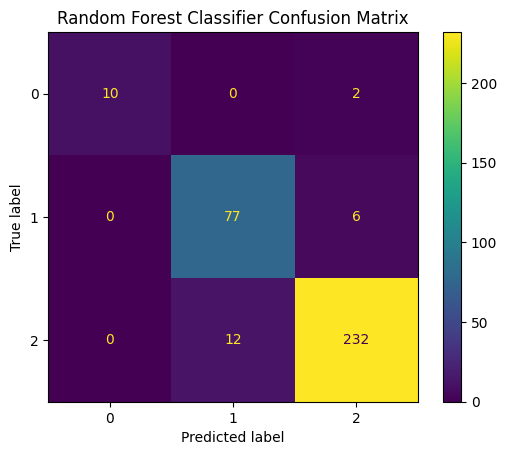

In [ ]:
cm = confusion_matrix(y_test, pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

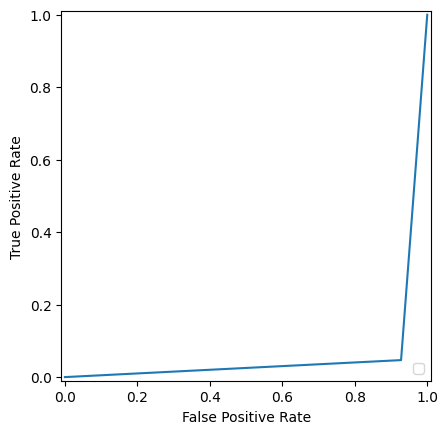

In [ ]:
y_test = (y_test ==1).astype(int).to_numpy()
pred = (pred == 1).astype(int)

y_test = y_test.reshape(-1, 1)
pred = pred.reshape(-1, 1)

tpr, fpr, _ = roc_curve(y_test, pred)
roc_display = RocCurveDisplay(tpr = tpr, fpr = fpr)

roc_display.plot()

In [ ]:
auc = tf.keras.metrics.AUC()
auc.update_state(y_test, pred)

auc_value = auc.result().numpy()
print(auc_value)

0.9404179


XGBClassifier

In [ ]:
X = df.drop(dropped, axis = 1)
y = df['chanceCreationShootingClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model4 = xg.XGBClassifier(use_label_encoder = False, evel_metric = 'logloss', class_weight = 'balanced')

#randomized search

params = {
    'max_depth':[None, 10, 15, 20, 25, 30],
}

random_search = RandomizedSearchCV(
    estimator = model4,
    param_distributions=params,
    n_iter=10,
    cv=3,
    random_state=42,
    n_jobs=-1)


random_search.fit(X_train, y_train)
print(random_search.best_params_)
print(random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:40:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "evel_metric" } are not used.

  warnings.warn(smsg, UserWarning)


{'max_depth': 10}
0.8795269770879527


In [ ]:
params = {
    'max_depth': [5, 10, 15, 20]
}

#grid search

grid_search = GridSearchCV(
    estimator=model4,
    param_grid=params,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:40:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "evel_metric" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, class_weight='balanced',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     evel_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, ...),
             n_jobs=-1, param_grid={'max_depth': [5, 10, 15, 20]},
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_search.best_params_) #best paramter for max_depth

{'max_depth': 10}


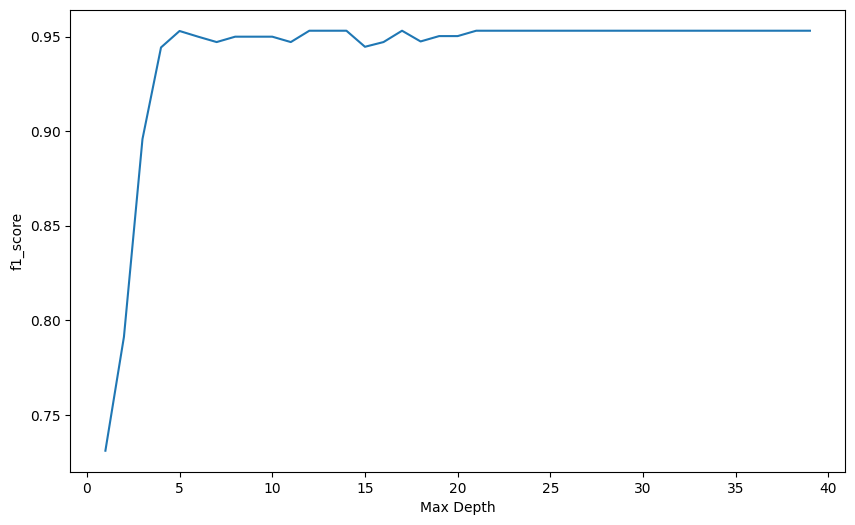

In [ ]:
mae_values = []

for k in range(1, 40):
  grid_model = xg.XGBClassifier(max_depth = k, random_state = 0)
  grid_model.fit(X_train, y_train)
  pred = grid_model.predict(X_test)
  mae_values.append(f1_score(y_test, pred, average='weighted'))

plt.figure(figsize=(10, 6))
plt.xlabel('Max Depth')
plt.ylabel("f1_score")
plt.plot(range(1, 40), mae_values)

In [ ]:
weight = np.where(y_train == 0, 1, 1) #setting weights

model4 = xg.XGBClassifier(eval_metric = 'logloss', booster = 'gbtree', max_depth = 10, n_estimators = 200)

model4.fit(X_train, y_train, sample_weight = weight)

pred = model4.predict(X_test)

In [ ]:
xgb_f1_score = f1_score(y_test, pred, average = 'weighted')
xgb_precision = precision_score(y_test, pred, average = 'weighted')
xgb_recall = recall_score(y_test, pred, average = 'weighted')


print(accuracy_score(y_test, pred)) #metrics
print(balanced_accuracy_score(y_test, pred))
print(xgb_f1_score)
print(xgb_precision)
print(xgb_recall)


0.9587020648967551
0.9324003456752834
0.9587977157489005
0.9591567624098563
0.9587020648967551


[[ 15   0   2]
 [  0  72   4]
 [  1   7 238]]


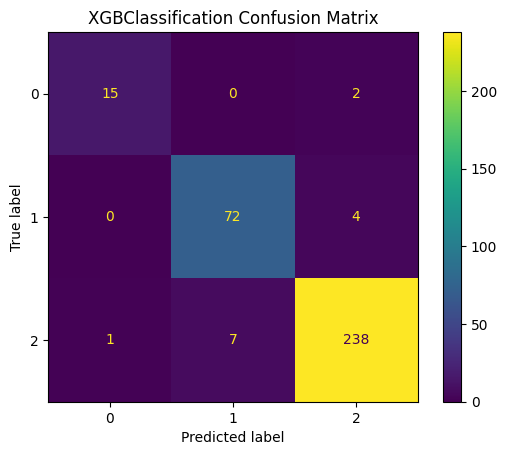

In [ ]:
cm = confusion_matrix(y_test, pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.title("XGBClassification Confusion Matrix")
plt.show()

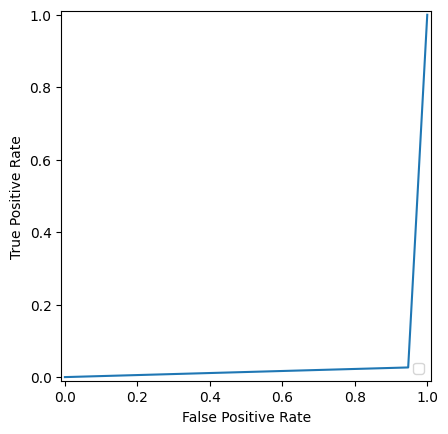

In [ ]:
y_test = (y_test ==1).astype(int).to_numpy()
pred = (pred == 1).astype(int)

y_test = y_test.reshape(-1, 1)
pred = pred.reshape(-1, 1)

tpr, fpr, _ = roc_curve(y_test, pred)
roc_display = RocCurveDisplay(tpr = tpr, fpr = fpr)

roc_display.plot()

In [ ]:
auc = tf.keras.metrics.AUC()
auc.update_state(y_test, pred)

auc_value = auc.result().numpy()
print(auc_value)

0.9603762


Voting Classifier

In [ ]:
X = df.drop(dropped, axis = 1)
y = df['chanceCreationShootingClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

voting_clf = VotingClassifier(
    estimators = [
        ('lr', model6), #Using all three models
        ('rf', model2),
        ('xgb', model4)
    ],
    voting = 'soft' #using soft voting instsead of hard
)

voting_clf.fit(X_train, y_train)

pred = voting_clf.predict(X_test)

vote_f1 = f1_score(y_test, pred, average = 'weighted')
vote_precision = precision_score(y_test, pred, average = 'weighted')
vote_recall = recall_score(y_test, pred, average = 'weighted')

print(accuracy_score(y_test, pred)) #metrics
print(balanced_accuracy_score(y_test, pred))
print(vote_f1)
print(vote_precision)
print(vote_recall)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9380530973451328
0.9138223967378992
0.9384097271604737
0.9391633890527695
0.9380530973451328


[[ 15   0   2]
 [  0  69   7]
 [  1  11 234]]


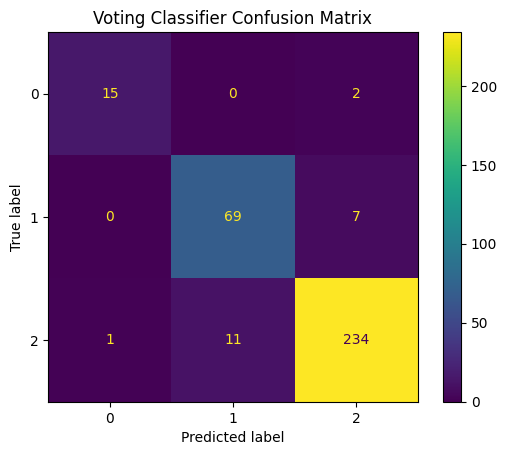

In [ ]:
cm = confusion_matrix(y_test, pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.title("Voting Classifier Confusion Matrix")
plt.show()


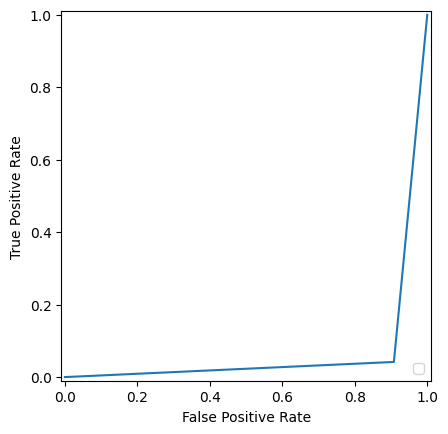

In [ ]:
y_test = (y_test ==1).astype(int).to_numpy()
pred = (pred == 1).astype(int)

y_test = y_test.reshape(-1, 1)
pred = pred.reshape(-1, 1)

tpr, fpr, _ = roc_curve(y_test, pred)
roc_display = RocCurveDisplay(tpr = tpr, fpr = fpr)

roc_display.plot()

In [ ]:
auc = tf.keras.metrics.AUC()
auc.update_state(y_test, pred)

auc_value = auc.result().numpy()
print(auc_value)

0.93303484


Feature Importance

In [ ]:
selector = RFE(model4, n_features_to_select = 5) #important features for XGB
selector.fit(X_train, y_train)
print(selector.support_)
print(selector.ranking_)

[False False  True False False  True  True False False False  True  True
 False False False False False False]
[ 8  2  1  5 14  1  1 10  3  9  1  1 12  7 11  6 13  4]


In [ ]:
selector = RFE(model6, n_features_to_select = 5) #important features for logistic regression
selector.fit(X_train, y_train)
print(selector.support_)
print(selector.ranking_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[False False False False False  True False False False False  True False
 False False  True False  True  True]
[14  3  4 12  8  1 10  6 11  5  1  7  2 13  1  9  1  1]


In [ ]:
selector = RFE(model2, n_features_to_select = 5) #important features for random forest
selector.fit(X_train, y_train)
print(selector.support_)
print(selector.ranking_)

[ True False False  True False False False False  True False False  True
 False  True False False False False]
[ 1  8  4  1 13  6  3 10  1  9  7  1 12  1  5  2 14 11]
